In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [3]:
mnist = tf.keras.datasets.mnist

In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [6]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train_full.shape

(60000, 28, 28)

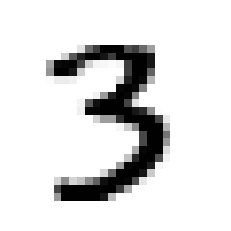

In [9]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis('off')
plt.show()

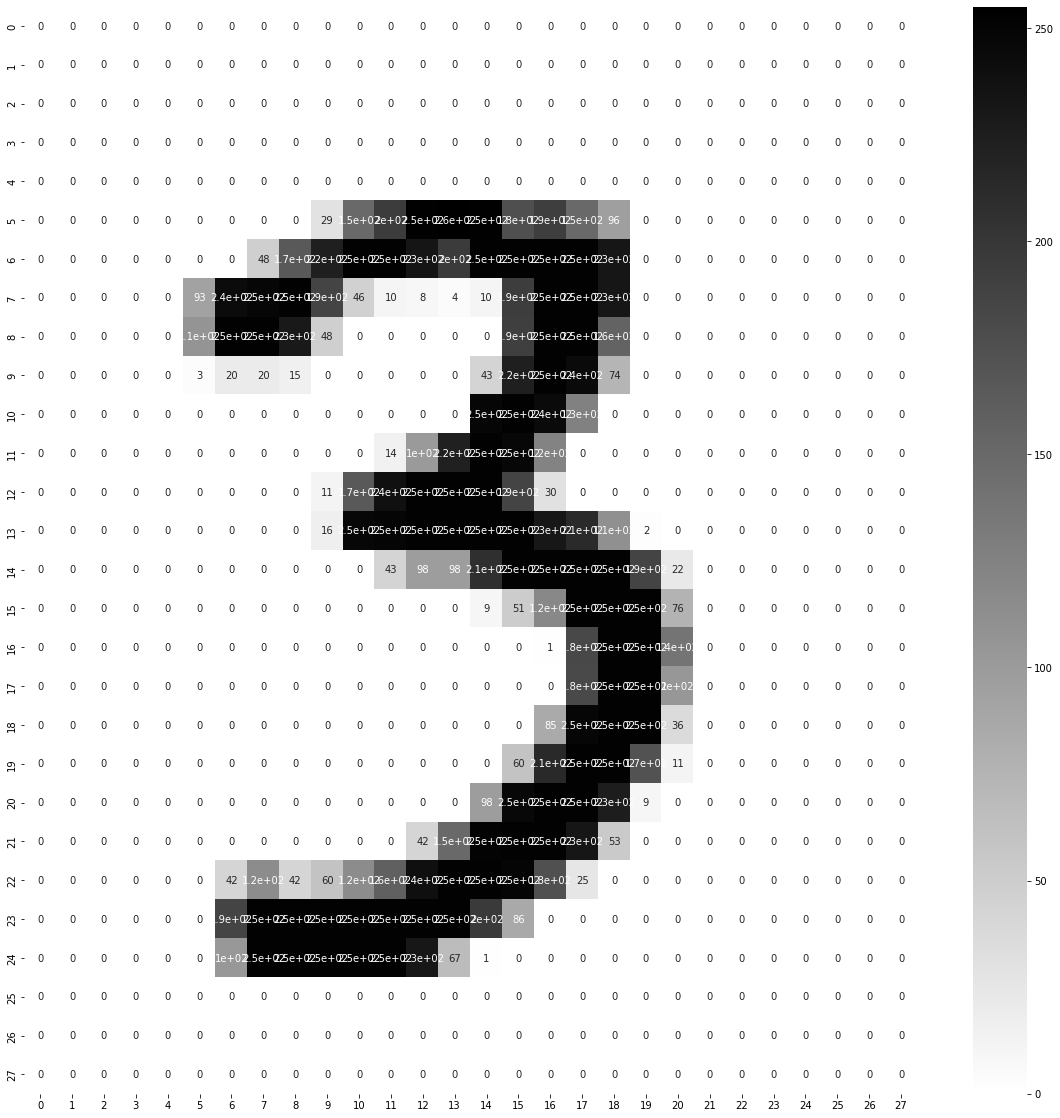

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_full[10000],cmap='binary',annot=True)

In [16]:
X_valid,X_train = X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000]/255,y_train_full[5000:]/255

In [17]:
X_test = X_test/255

In [19]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


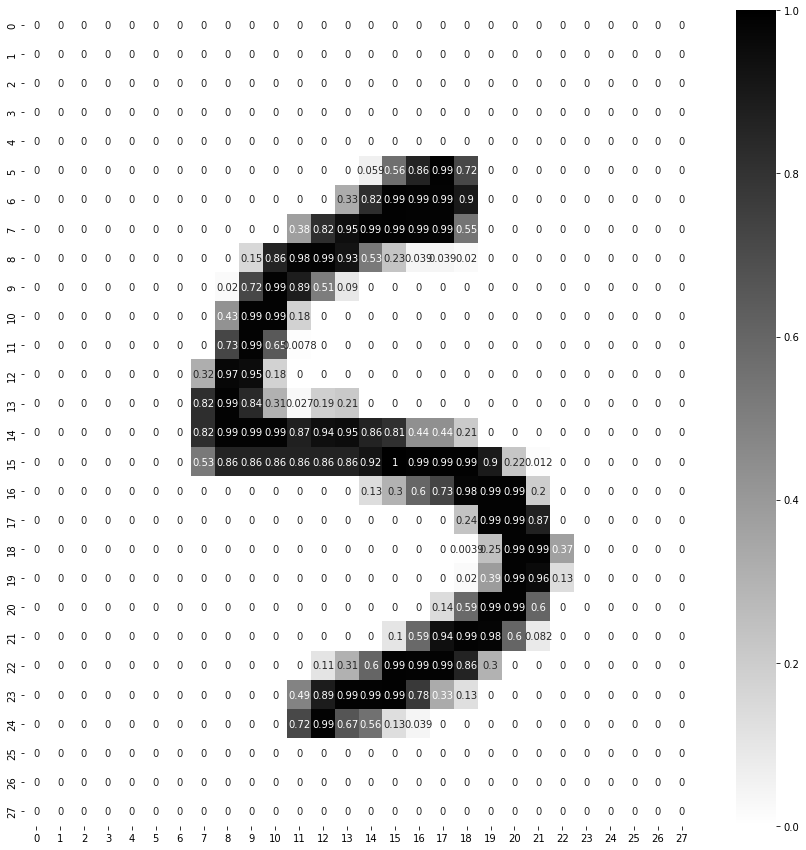

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[10000],cmap='binary',annot=True)

In [23]:
LAYERS =[tf.keras.layers.Flatten(input_shape=(28,28),name='inputlayer'),
         tf.keras.layers.Dense(300,activation='relu',name='hiddenlayer1'),
         tf.keras.layers.Dense(100,activation='relu',name='hiddenlayer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='outputlayer')]

In [24]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [25]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS =['accuracy']

In [27]:
model_clf.compile(loss = LOSS_FUNCTION,optimizer= OPTIMIZER,metrics=METRICS)

In [29]:
model_clf.layers[1].name

'hiddenlayer1'

In [30]:
hidden1 = model_clf.layers[1]

In [31]:
hidden1.get_weights()

[array([[ 0.05889115,  0.01107623,  0.03766932, ...,  0.00095235,
          0.03578044, -0.03931187],
        [-0.02100939,  0.06975324, -0.05488094, ...,  0.05802776,
         -0.04090982, -0.06246908],
        [-0.00034904, -0.02818797,  0.01025427, ...,  0.06211367,
          0.02733795,  0.04425354],
        ...,
        [-0.04694002, -0.02493875, -0.01094215, ..., -0.07265402,
          0.00026044, -0.02180559],
        [-0.02444805,  0.01914993,  0.02282137, ..., -0.03337187,
         -0.0661761 , -0.06484509],
        [ 0.02451581, -0.0730299 ,  0.02692925, ...,  0.01215322,
         -0.04149661,  0.03310176]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [32]:
EPOCHS=5
VALIDATION_SET = (X_valid,y_valid)
history = model_clf.fit(X_train,y_train,epochs = EPOCHS,validation_data =VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 8s 3ms/step - loss: 0.0022 - accuracy: 0.0990 - val_loss: 2.9543e-07 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 1.7559e-07 - accuracy: 0.0990 - val_loss: 3.8289e-08 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 3.2610e-08 - accuracy: 0.0990 - val_loss: 8.8691e-09 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 9.3329e-09 - accuracy: 0.0990 - val_loss: 2.6941e-09 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 3.3075e-09 - accuracy: 0.0990 - val_loss: 1.0252e-09 - val_accuracy: 0.0958


In [34]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [36]:
model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_01_22_11_01_28_.h5


In [38]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,2.162059e-03,0.098964,2.954290e-07,0.0958
1,1.755924e-07,0.098982,3.828907e-08,0.0958
2,3.260978e-08,0.098982,8.869112e-09,0.0958
3,9.332901e-09,0.098982,2.694124e-09,0.0958
4,3.307496e-09,0.098982,1.025199e-09,0.0958


In [59]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3590 - accuracy: 0.0980


[2.359039783477783, 0.09799999743700027]

In [40]:
X_test[3]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

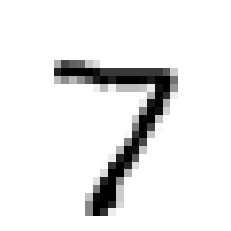

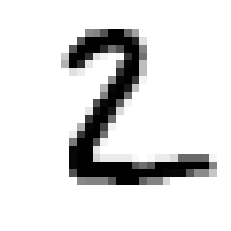

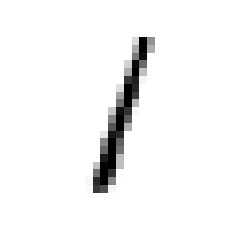

In [41]:
for i in range(3):
  plt.imshow(X_test[i],cmap='binary')
  plt.axis('off')
  plt.show()

In [62]:
prediction = model_clf.predict(X_test[:3])

1/1 [==============================] - 0s 16ms/step


In [63]:
prediction

array([[0.22049788, 0.0883546 , 0.08486453, 0.08626185, 0.08599728,
        0.08655145, 0.08411448, 0.08709478, 0.09019603, 0.08606713],
       [0.23424341, 0.08680184, 0.08318457, 0.08477259, 0.08473705,
        0.08477297, 0.08241421, 0.08565036, 0.08900593, 0.08441707],
       [0.21244784, 0.08907588, 0.08581124, 0.08750742, 0.08700981,
        0.08739367, 0.08511293, 0.08807614, 0.09081694, 0.08674812]],
      dtype=float32)

In [64]:
y_prob=prediction[0]

In [65]:
y_prob.round(5)

array([0.2205 , 0.08835, 0.08486, 0.08626, 0.086  , 0.08655, 0.08411,
       0.08709, 0.0902 , 0.08607], dtype=float32)

In [66]:
np.argmax(y_prob.round(5))

0

In [67]:
y_prob=prediction[1]

In [68]:
np.argmax(y_prob)

0

In [69]:
y_pred_prb = model_clf.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [70]:
y_pred = np.argmax(y_pred_prb)

In [71]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test,y_pred)

TypeError: ignored